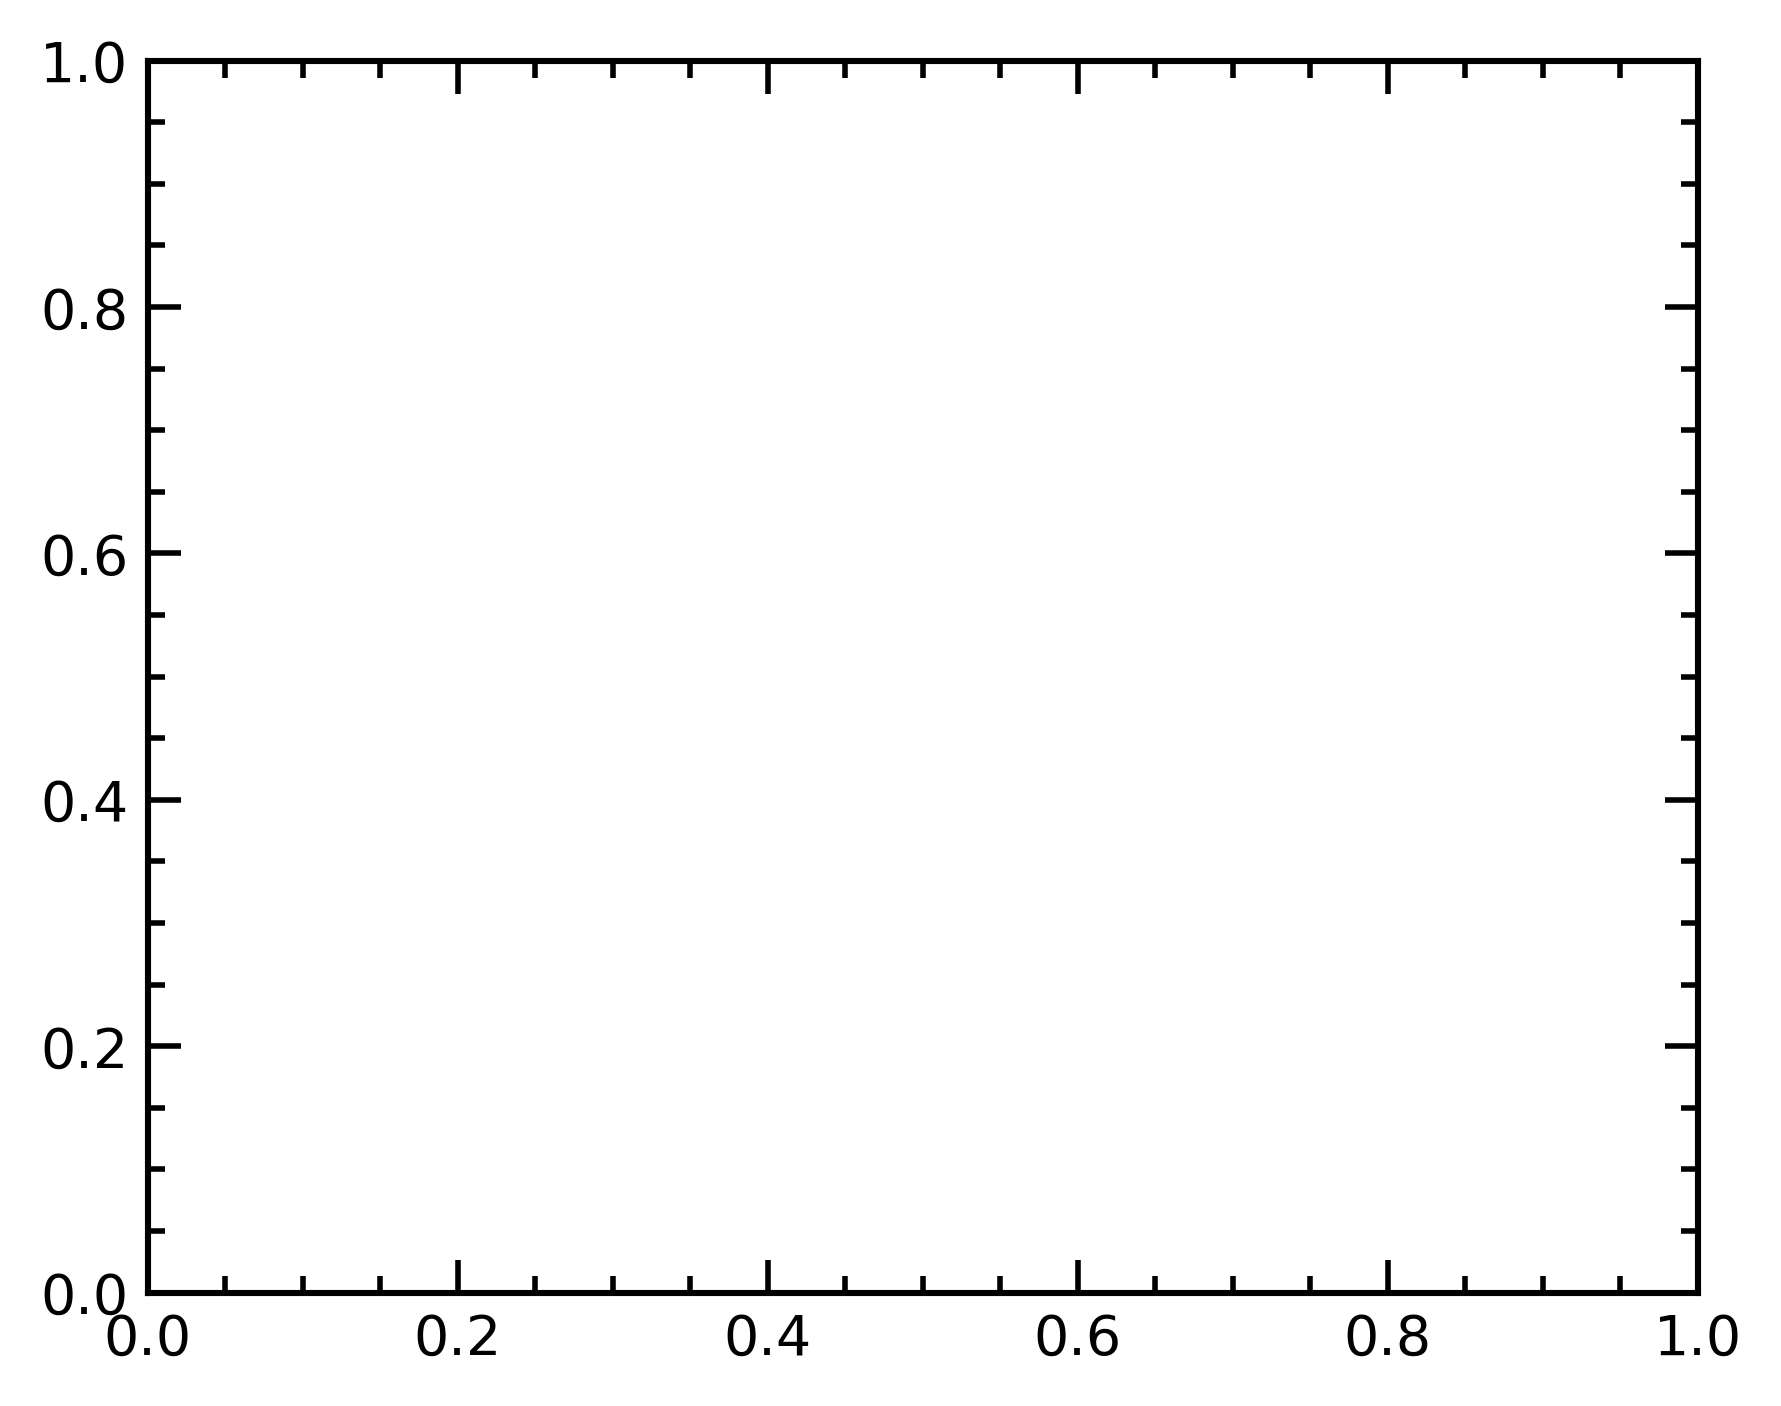

In [6]:
import pyNUISANCE as pn
import pyProSelecta as pps
import matplotlib.pyplot as plt
pn.cern()

evs = pn.EventSource("../../runs/NUWRO-D2-ANL_77-numu/NUWRO.numu.numu_flux.ANL_1977_2horn_rescan.8652.evts.root")
if not evs:
    print("Error: failed to open input file")

def q0(ev):
    bpart = pps.sel.Beam(ev,14)
    lpart = pps.sel.OutPartHM(ev,13)
    if not bpart or not lpart:
        return -0
    return (bpart.momentum() - lpart.momentum()).e() / 1E3

def q3(ev):
    bpart = pps.sel.Beam(ev,14)
    lpart = pps.sel.OutPartHM(ev,13)
    if not bpart or not lpart:
        return -0
    return (bpart.momentum() - lpart.momentum()).length() / 1E3


def enu_GeV(ev):
    bpart = pps.sel.Beam(ev,14)
    if bpart:
        return bpart.momentum().e() * 1E-3 # events are always with MeV momentum units
    return -0

In [2]:
pps.load_text("""
double enu_GeV(HepMC3::GenEvent const &ev){
  auto bpart = ps::sel::Beam(ev,14);
  if(bpart) {
    return bpart->momentum().e()*1E-3;
  }
  return -0;
}
""")
enu_GeV_cpp = pps.project.get("enu_GeV")


In [3]:
evs = pn.EventSource("../../runs/NUWRO-D2-ANL_77-numu/NUWRO.numu.numu_flux.ANL_1977_2horn_rescan.8652.evts.root")
fr = pn.FrameGen(evs, 1000)

fr.add_column("enu_GeV",enu_GeV_cpp)
fr.add_column("enu_GeV2",pps.project.get("enu_GeV"))
fr.add_column("q0",q0)
fr.add_column("q3",q3)
fr.add_column("enu", pps.project.enu)
fr.add_column("proc_id", pps.filter.proc_id)

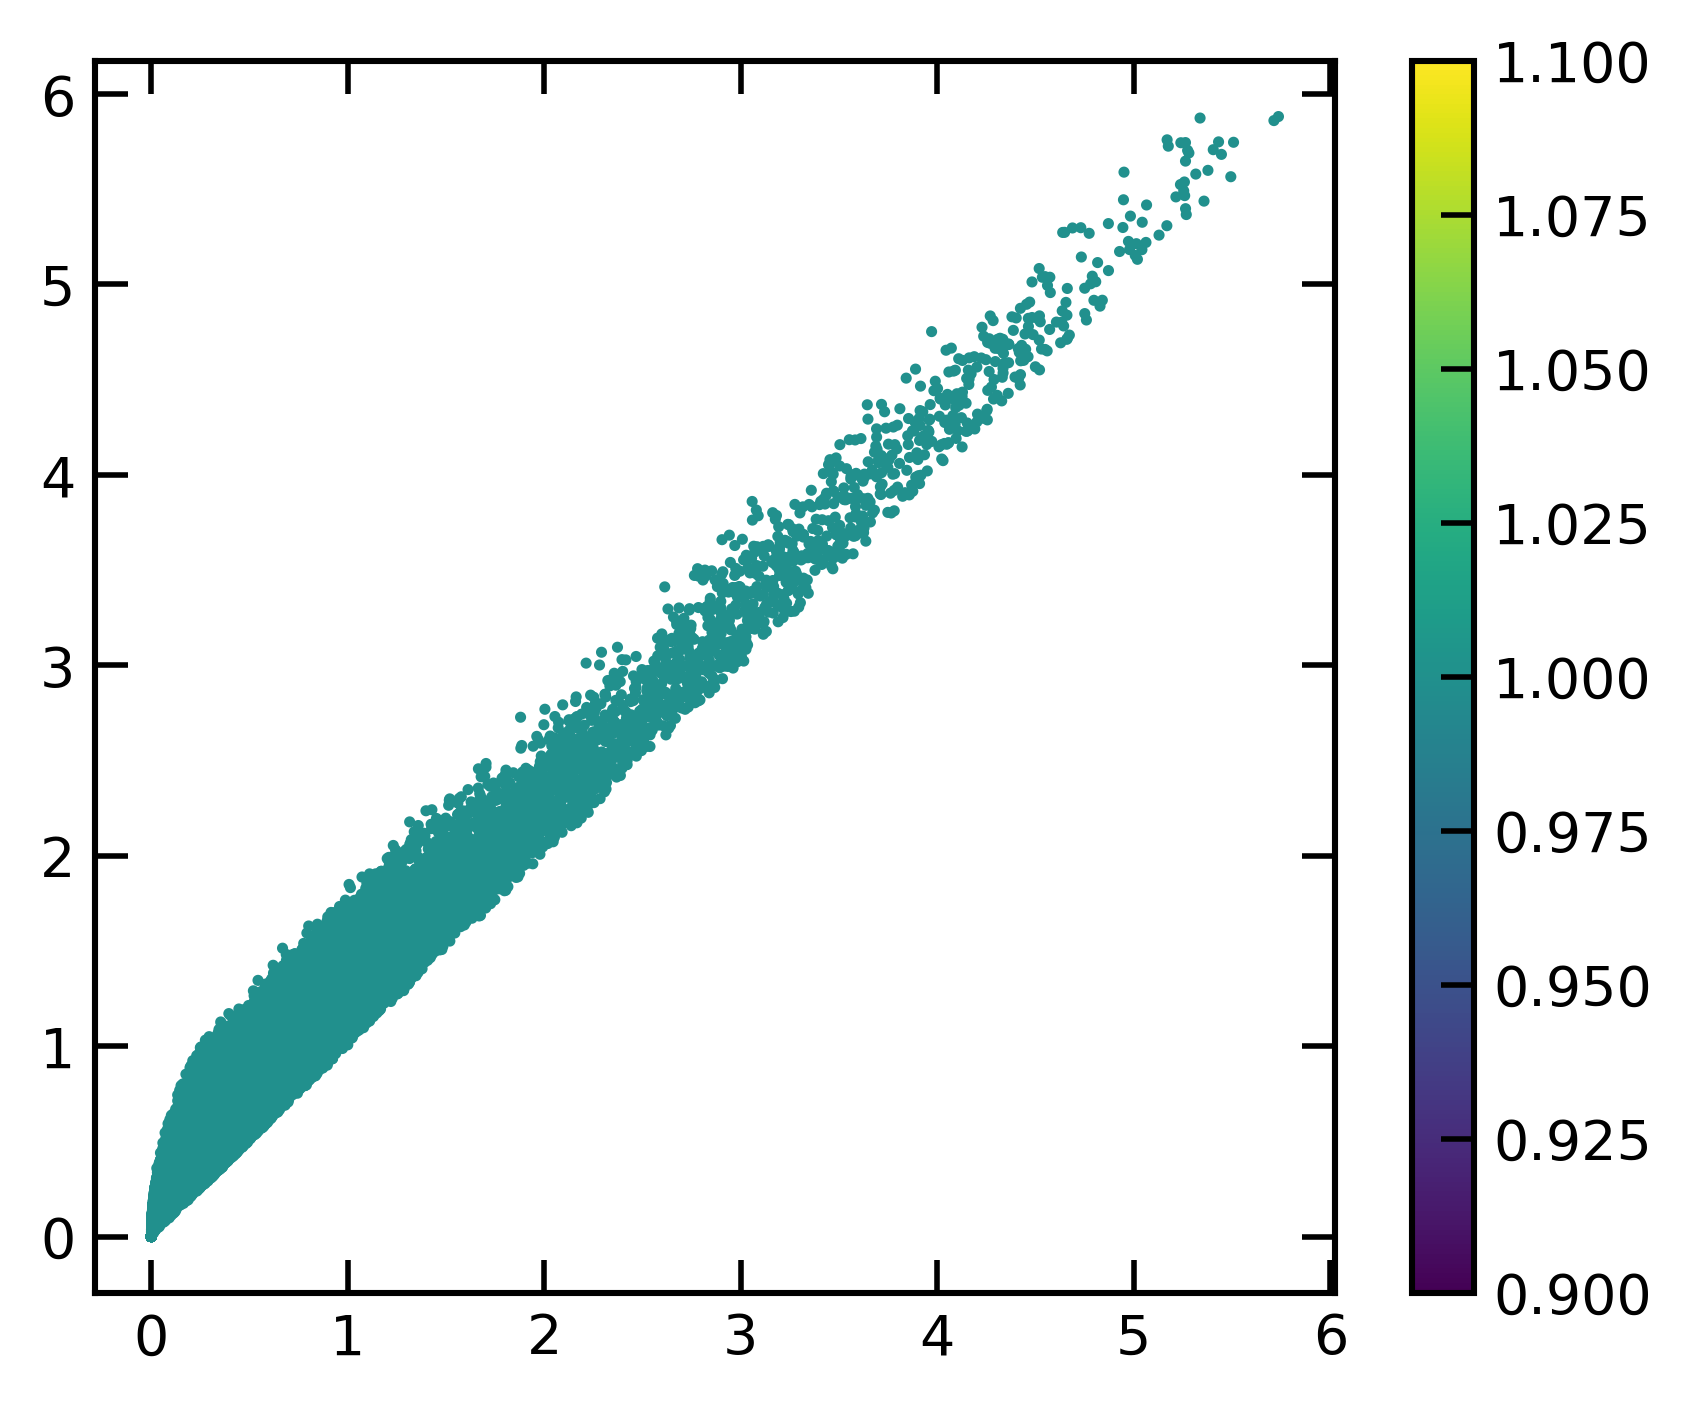

In [4]:
import matplotlib.pyplot as plt
fr.mpl().scatter("q0","q3", c="proc_id", s=1)
plt.colorbar()
plt.show()

 ------------------------------------------------------------------------
 | evt# | cvw | enu_GeV | enu_GeV2 |      q0 |     q3 |   enu | proc_id |
 ------------------------------------------------------------------------
 |    0 |   1 |   1.611 |    1.611 |  0.6672 |  1.048 |  1611 |       1 |
 |    1 |   1 |  0.4423 |   0.4423 |  0.1882 | 0.4493 | 442.3 |       1 |
 |    2 |   1 |   1.764 |    1.764 |  0.6213 | 0.8368 |  1764 |       1 |
 |    3 |   1 |   1.112 |    1.112 |  0.3569 | 0.8449 |  1112 |       1 |
 |    4 |   1 |  0.3403 |   0.3403 | 0.07326 |   0.45 | 340.3 |       1 |
 |    5 |   1 |  0.5759 |   0.5759 |  0.2924 | 0.7778 | 575.9 |       1 |
 |    6 |   1 |   1.558 |    1.558 |       0 |      0 |  1558 |       1 |
 |    7 |   1 |  0.3038 |   0.3038 | 0.04715 | 0.3047 | 303.8 |       1 |
 |    8 |   1 |   1.235 |    1.235 |  0.3565 | 0.8925 |  1235 |       1 |
 |    9 |   1 |  0.3378 |   0.3378 |  0.1184 | 0.4593 | 337.8 |       1 |
 |   10 |   1 |  0.2805 |   0.2805 | 0

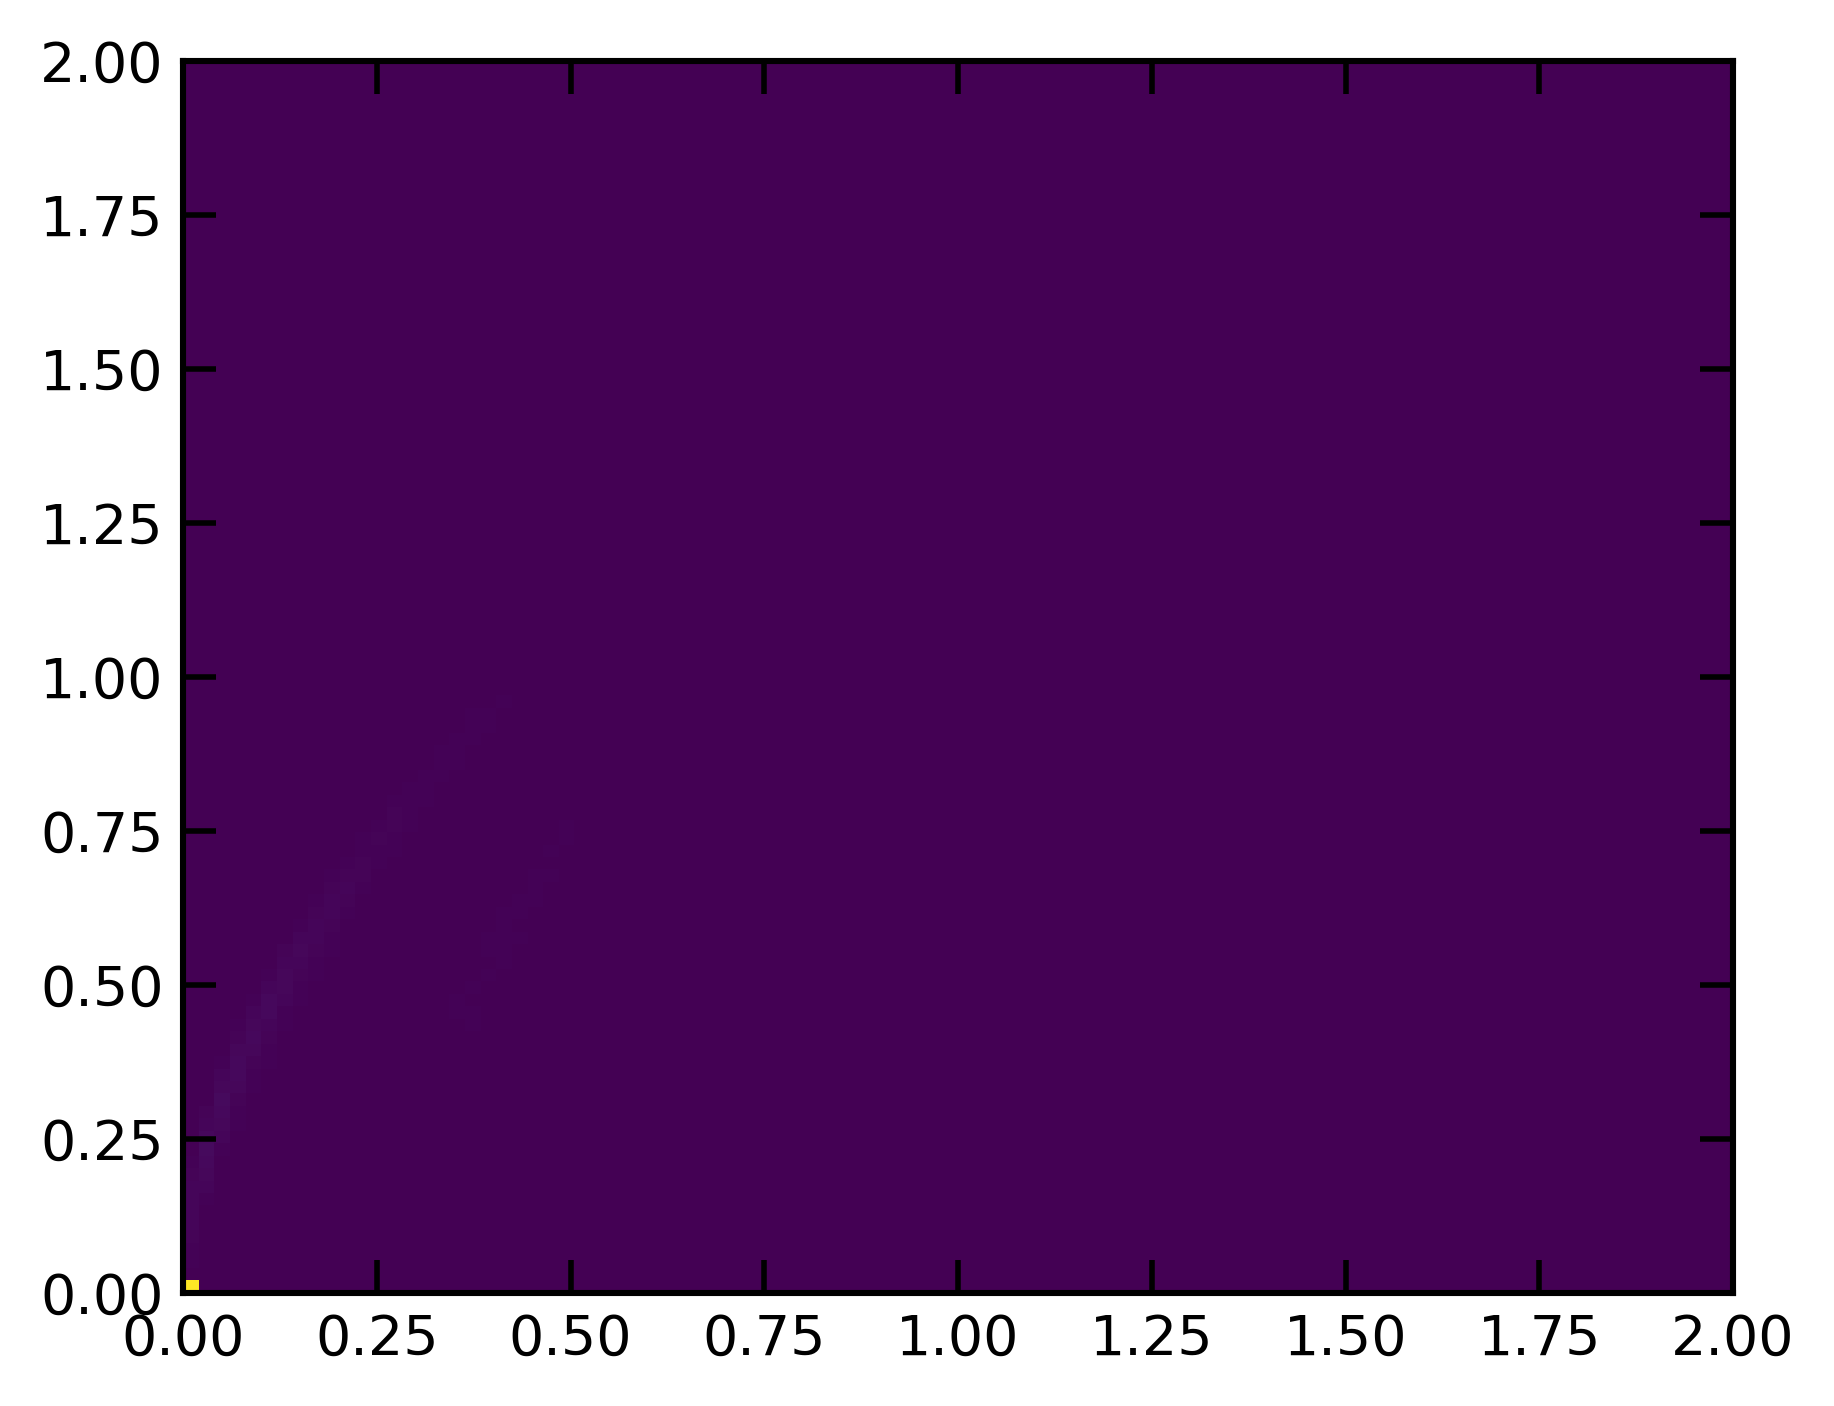

In [5]:
import numpy as np
df = fr.all()
df.mpl().hist2d("q0", "q3", bins=[np.linspace(0.0,2.0,100),np.linspace(0.0,2.0,100)])
plt.show()